# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## 1. Preprocessing

1. Read the file `checker-submits.csv`.
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [ ]:
df = pd.read_csv("../data/checker_submits.csv", parse_dates=['timestamp'])
df['time'] = df['timestamp'].dt.time
df['hour'] = df['time'].apply(lambda x: x.hour)
df['dayofweek'] = df['timestamp'].apply(lambda x: x.day_of_week)
df = df.drop(columns=['timestamp', 'time'])
df.info()

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [ ]:
enc = OneHotEncoder(drop='first') 
X_encoded = enc.fit_transform(df[['uid', 'labname']])
encoded_feature_names = enc.get_feature_names_out(['uid', 'labname'])

df_encoded = pd.DataFrame(X_encoded.toarray(), columns=encoded_feature_names)
df_numeric = df[['numTrials', 'hour', 'dayofweek']].reset_index(drop=True)
df = pd.concat([df_encoded, df_numeric], axis=1)
df.info()

,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,uid_user_18,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,5,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,5,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,5,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9,20,3
1682,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,20,3
1683,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,20,3
1684,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,20,3


In [4]:
scaler = StandardScaler()
df[['numTrials', 'hour']] = scaler.fit_transform(df[['numTrials', 'hour']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid_user_1        1686 non-null   float64
 1   uid_user_10       1686 non-null   float64
 2   uid_user_11       1686 non-null   float64
 3   uid_user_12       1686 non-null   float64
 4   uid_user_13       1686 non-null   float64
 5   uid_user_14       1686 non-null   float64
 6   uid_user_15       1686 non-null   float64
 7   uid_user_16       1686 non-null   float64
 8   uid_user_17       1686 non-null   float64
 9   uid_user_18       1686 non-null   float64
 10  uid_user_19       1686 non-null   float64
 11  uid_user_2        1686 non-null   float64
 12  uid_user_20       1686 non-null   float64
 13  uid_user_21       1686 non-null   float64
 14  uid_user_22       1686 non-null   float64
 15  uid_user_23       1686 non-null   float64
 16  uid_user_24       1686 non-null   float64


In [5]:
df.to_csv('../data/dayofweek.csv', index=False)

In [6]:
accuracy_score(df['dayofweek'], df['dayofweek'].apply(df['dayofweek'].mode))

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [7]:
regr = LogisticRegression(random_state=21, fit_intercept=False)
X = df.drop(columns=['dayofweek'])
y = df['dayofweek']
regr.fit(X, y)
pred = regr.predict(X)

In [8]:
accuracy_score(y, pred)

0.6239620403321471

In [9]:
def get_feature_importance(model):
    '''
        Получаем важность коэффициентов для разных моделей
    '''
    if hasattr(model, 'coef_'):
        coef = model.coef_
        # Если это матрица
        if isinstance(coef, np.ndarray) and coef.ndim > 1:
            importance = np.abs(coef).sum(axis=0)
        else:
            importance = np.abs(coef)
        return importance

    elif hasattr(model, 'feature_importances_'):
        return model.feature_importances_

    elif hasattr(model, 'estimators_'):
        # Собираем важности
        importance_list = []
        for est in model.estimators_:
            if hasattr(est, 'coef_'):
                # Если есть coef_, суммируем по классам
                coef = est.coef_
                importance_list.append(np.abs(coef).sum(axis=0))
            elif hasattr(est, 'feature_importances_'):
                importance_list.append(est.feature_importances_)
        # Складываем важности
        return np.array(importance_list).sum(axis=0)
    else:
        raise ValueError("Не удалось получить коэффициенты модели")

def plot_top_features(model, feature_names, top_n=10):
    importance = get_feature_importance(model)
    feature_importance = pd.Series(importance, index=feature_names)
    top_features = feature_importance.nlargest(top_n)

    plt.figure(figsize=(8, 6))
    top_features.plot(kind='barh')
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Features')
    plt.gca().invert_yaxis()
    plt.show()

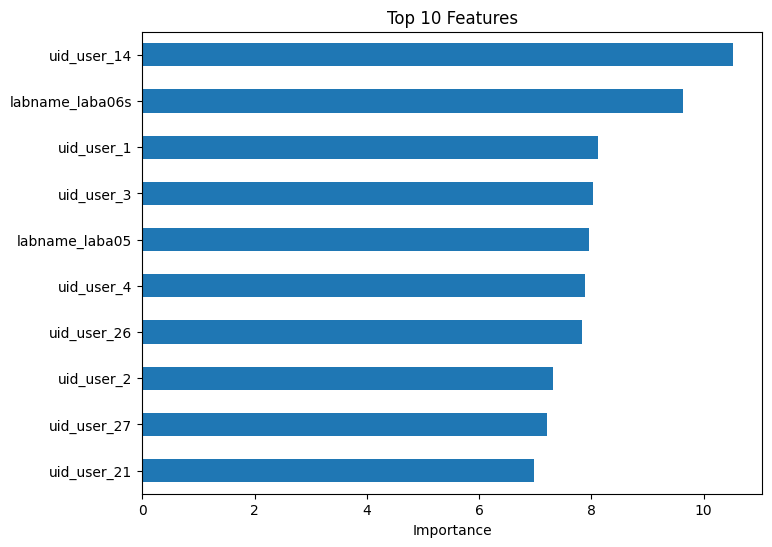

In [10]:
plot_top_features(regr, X.columns, 10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [11]:
svc = SVC(random_state=21, probability=True, kernel='linear')
svc.fit(X, y)
pred = svc.predict(X)

In [12]:
accuracy_score(y, pred)

0.7058125741399762

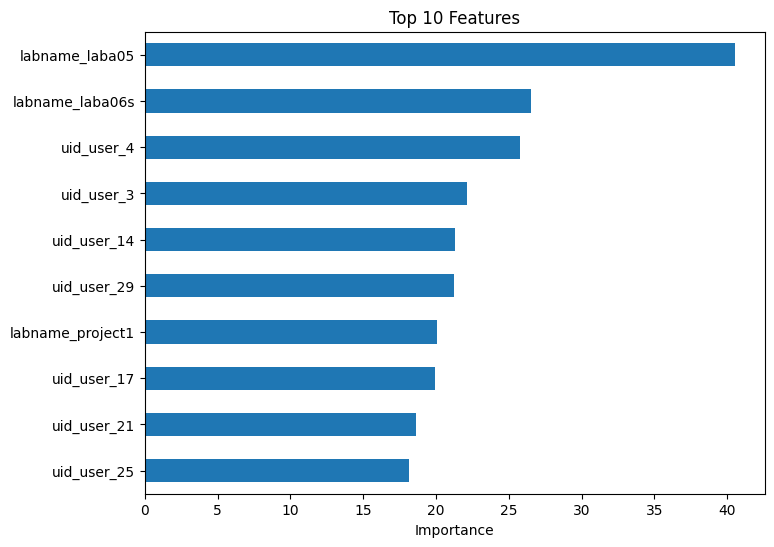

In [13]:
plot_top_features(svc, X.columns, 10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [14]:
dtree = DecisionTreeClassifier(random_state=21, max_depth=4)
dtree.fit(X, y)
pred = dtree.predict(X)

In [15]:
accuracy_score(y, pred)

0.5516014234875445

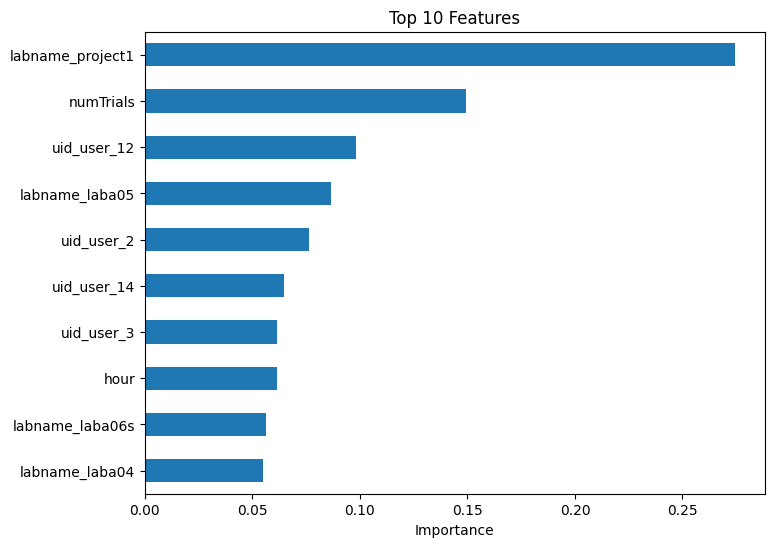

In [16]:
plot_top_features(dtree, X.columns, 10)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [17]:
rfor = RandomForestClassifier(random_state=21, max_depth=25, n_estimators=100)
rfor.fit(X, y)
pred = rfor.predict(X)

In [18]:
accuracy_score(y, pred)

1.0

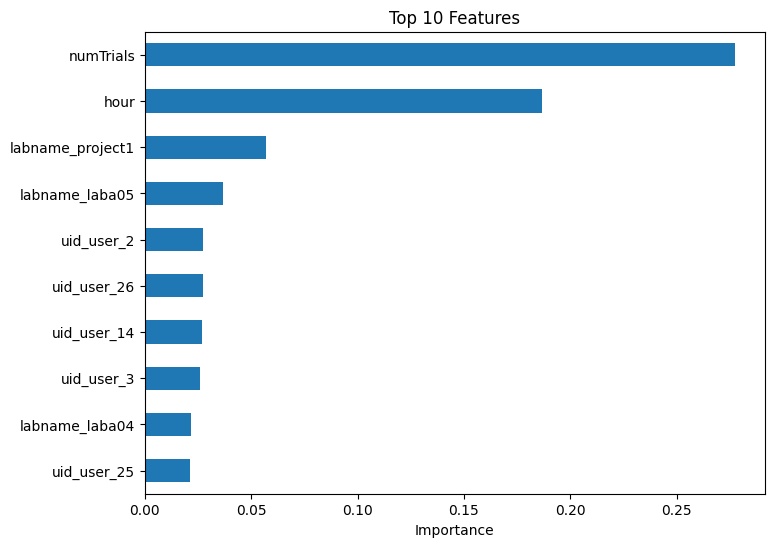

In [19]:
plot_top_features(rfor, X.columns, 10)